In [2]:
# Import Libraries & Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"C:\Users\1234\Desktop\Telecom Customer Churn\Data & Resources\PREDICTION_DATA.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age  Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35    False        Delhi                    7   
1   58353-MAH  Female   45     True  Maharashtra                   14   
2   25063-WES    Male   51    False  West Bengal                    4   
3   59787-KAR    Male   79    False    Karnataka                    3   
4   28544-TAM  Female   80    False   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal  Phone_Service  Multiple_Lines  ...  \
0                27        NaN           True           False  ...   
1                13        NaN           True            True  ...   
2                35     Deal 5           True           False  ...   
3                21     Deal 4           True           False  ...   
4                 8        NaN           True           False  ...   

    Payment_Method Monthly_Charge  Total_Charges  Total_Refunds  \
0      Credit Card      65.599998     593.299988       0.000000   
1     

In [3]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,False,Delhi,7,27,NaN,True,False,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,Others,Others
1,58353-MAH,Female,45,True,Maharashtra,14,13,NaN,True,True,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,Others,Others
2,25063-WES,Male,51,False,West Bengal,4,35,Deal 5,True,False,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,False,Karnataka,3,21,Deal 4,True,False,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,False,Tamil Nadu,3,8,NaN,True,False,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability


In [4]:
# Data Processing
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be Label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#Train Random Forest Model
#Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model 
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[791  50]
 [125 236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.83      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



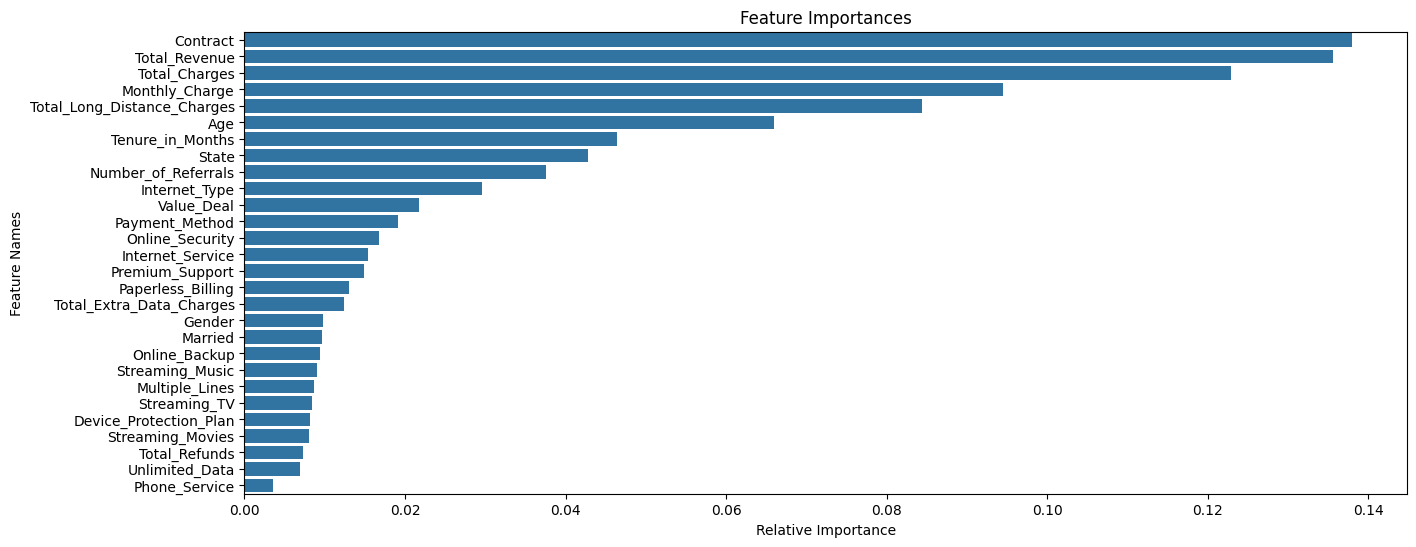

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [ ]:
# Predict on New Data
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\1234\Desktop\Telecom Customer Churn\Data & Resources\PREDICTION_DATA.xlsx"
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won’t be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved Label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(
    r"C:\Users\1234\Desktop\Telecom Customer Churn\Data & Resources\Predictions.csv",
    index=False
)
